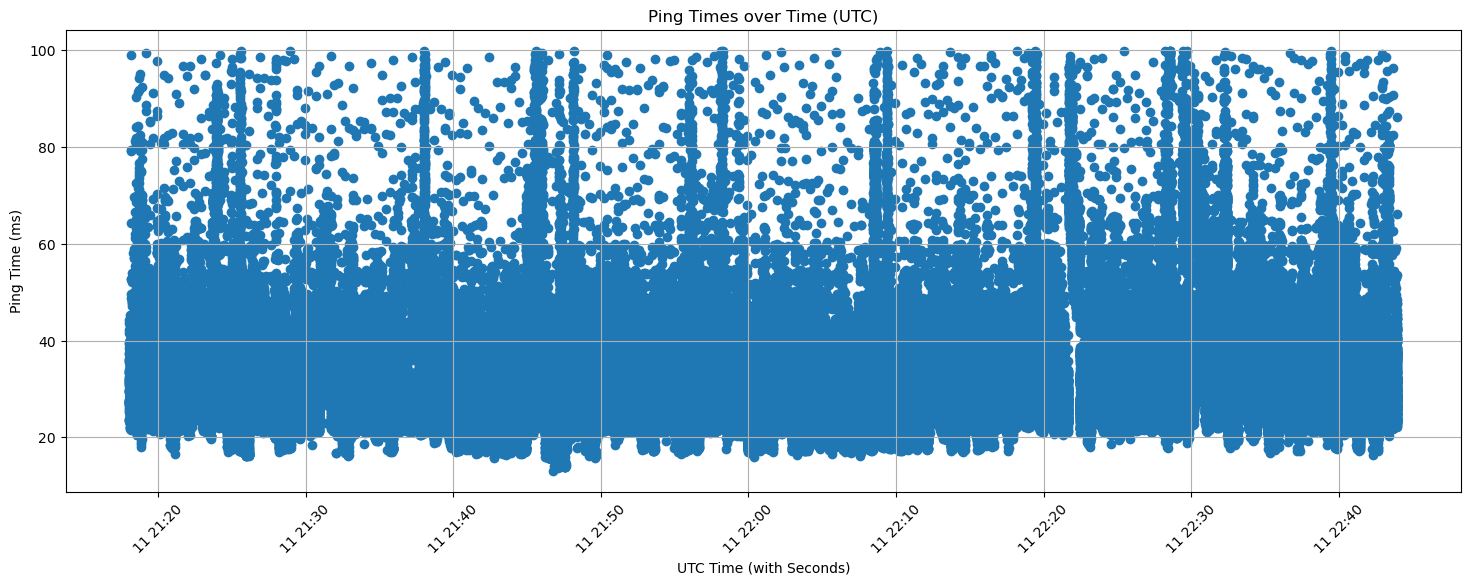

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Loading the file content
file_path = 'o.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Plotting the data as a scatter plot
plt.figure(figsize=(18, 6))
plt.scatter(df['UTC Time'], df['Ping Time'], marker='o')
plt.xlabel('UTC Time (with Seconds)')
plt.ylabel('Ping Time (ms)')
plt.title('Ping Times over Time (UTC)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


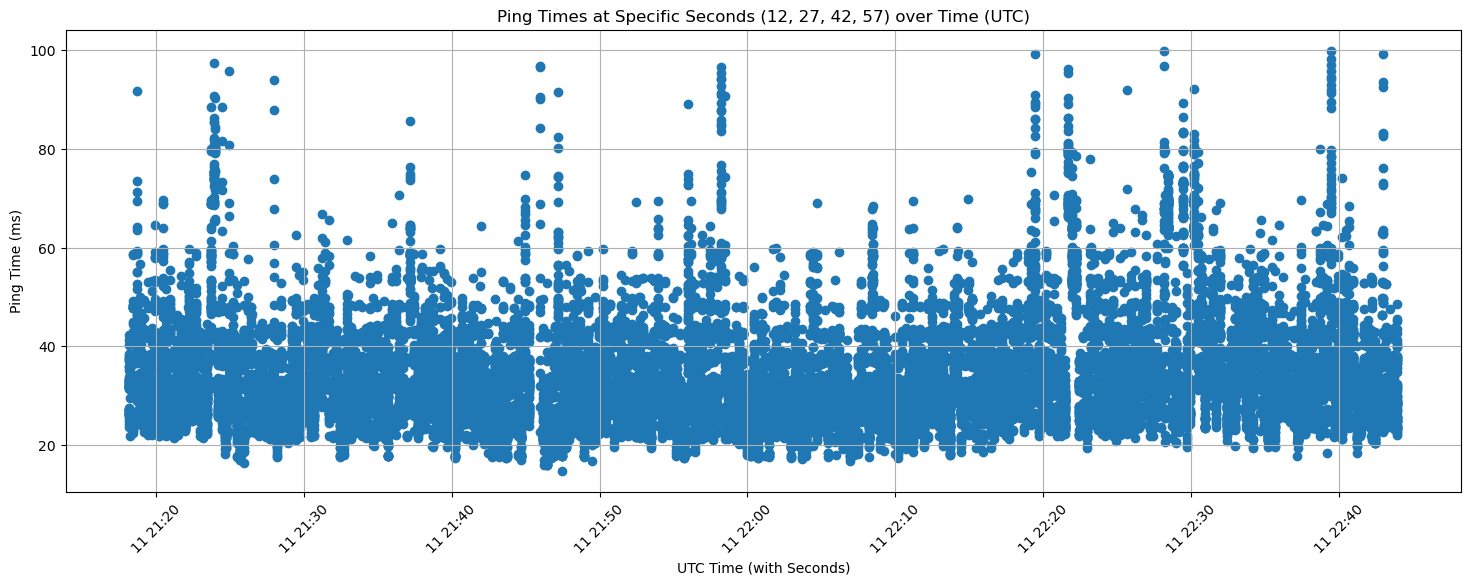

           Timestamp  Ping Time                            UTC Time  Seconds
620     1.718141e+09       26.4 2024-06-11 21:18:12.005448960+00:00       12
621     1.718141e+09       32.0 2024-06-11 21:18:12.021699840+00:00       12
622     1.718141e+09       33.3 2024-06-11 21:18:12.038280960+00:00       12
623     1.718141e+09       24.3 2024-06-11 21:18:12.043483136+00:00       12
624     1.718141e+09       32.9 2024-06-11 21:18:12.065006848+00:00       12
...              ...        ...                                 ...      ...
356374  1.718146e+09       37.9 2024-06-11 22:43:57.937200128+00:00       57
356375  1.718146e+09       41.3 2024-06-11 22:43:57.953392128+00:00       57
356376  1.718146e+09       36.4 2024-06-11 22:43:57.968674816+00:00       57
356377  1.718146e+09       37.1 2024-06-11 22:43:57.984787968+00:00       57
356378  1.718146e+09       28.4 2024-06-11 22:43:57.992221952+00:00       57

[23660 rows x 4 columns]


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Loading the file content
file_path = 'o.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Filtering the data to show only the times when the seconds are 12, 27, 42, or 57
df['Seconds'] = df['UTC Time'].dt.second
filtered_df = df[df['Seconds'].isin([12, 27, 42, 57])]

# Plotting the filtered data as a scatter plot
plt.figure(figsize=(18, 6))
plt.scatter(filtered_df['UTC Time'], filtered_df['Ping Time'], marker='o')
plt.xlabel('UTC Time (with Seconds)')
plt.ylabel('Ping Time (ms)')
plt.title('Ping Times at Specific Seconds (12, 27, 42, 57) over Time (UTC)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Printing the filtered DataFrame for reference
print(filtered_df)


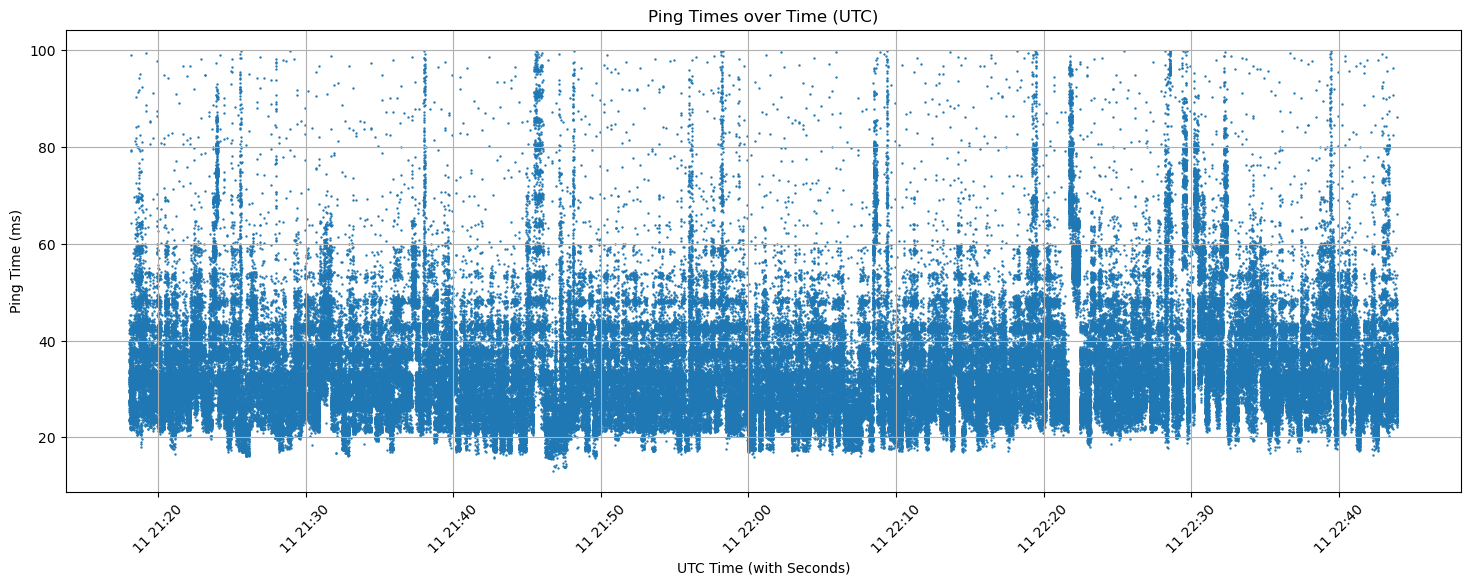

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Loading the file content
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Plotting the data as a scatter plot with smaller markers
plt.figure(figsize=(18, 6))
plt.scatter(df['UTC Time'], df['Ping Time'], marker='o', s=0.5)  # s controls the size of the markers
plt.xlabel('UTC Time (with Seconds)')
plt.ylabel('Ping Time (ms)')
plt.title('Ping Times over Time (UTC)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\ALI\AppData\Local\Temp\ipykernel_28676\3145930053.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Seconds'] = filtered_df['UTC Time'].dt.second


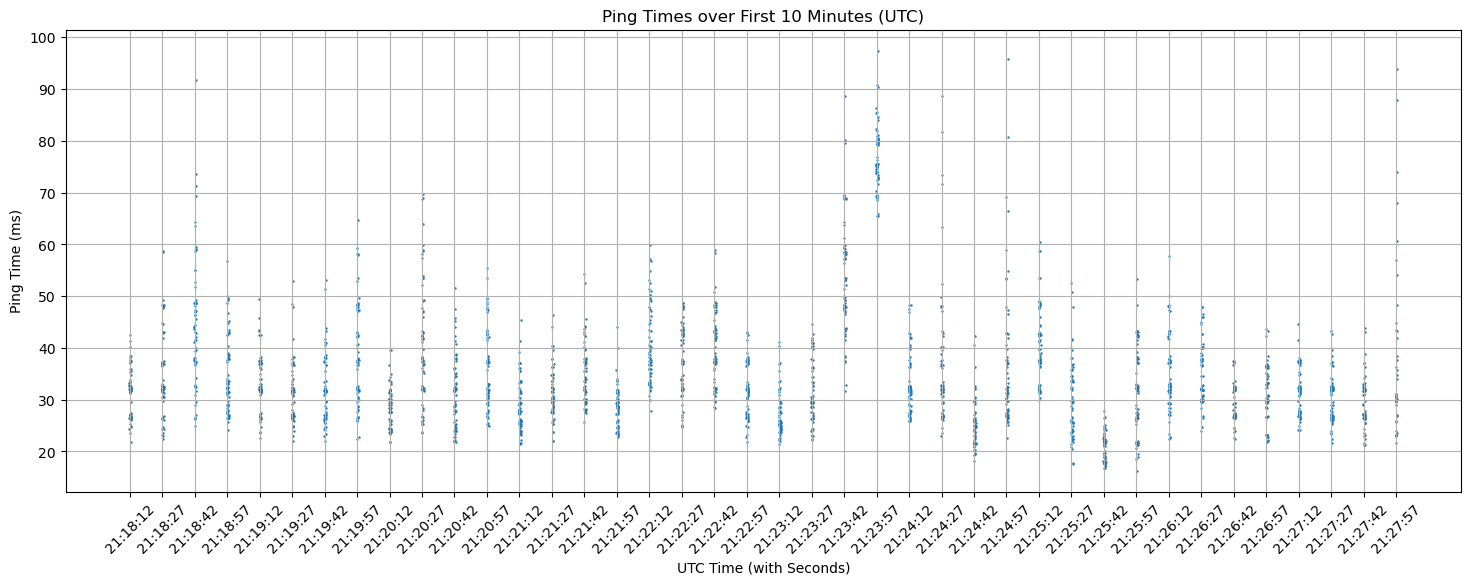

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Loading the file content
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Filter the DataFrame to include only the first 10 minutes
start_time = df['UTC Time'].min()
end_time = start_time + pd.Timedelta(minutes=10)
filtered_df = df[(df['UTC Time'] >= start_time) & (df['UTC Time'] <= end_time)]

# Filtering to show only specific seconds (12, 27, 42, 57)
filtered_df['Seconds'] = filtered_df['UTC Time'].dt.second
filtered_df = filtered_df[filtered_df['Seconds'].isin([12, 27, 42, 57])]

# Generating x-ticks at specific seconds of each minute
xticks = pd.date_range(start=start_time, end=end_time, freq='S')
xticks = xticks[xticks.second.isin([12, 27, 42, 57])]

# Plotting the data as a scatter plot with smaller markers
plt.figure(figsize=(18, 6))
plt.scatter(filtered_df['UTC Time'], filtered_df['Ping Time'], marker='o', s=0.5)  # s controls the size of the markers
plt.xlabel('UTC Time (with Seconds)')
plt.ylabel('Ping Time (ms)')
plt.title('Ping Times over First 10 Minutes (UTC)')
plt.xticks(xticks, xticks.strftime('%H:%M:%S'), rotation=45)
plt.grid(True)
plt.show()


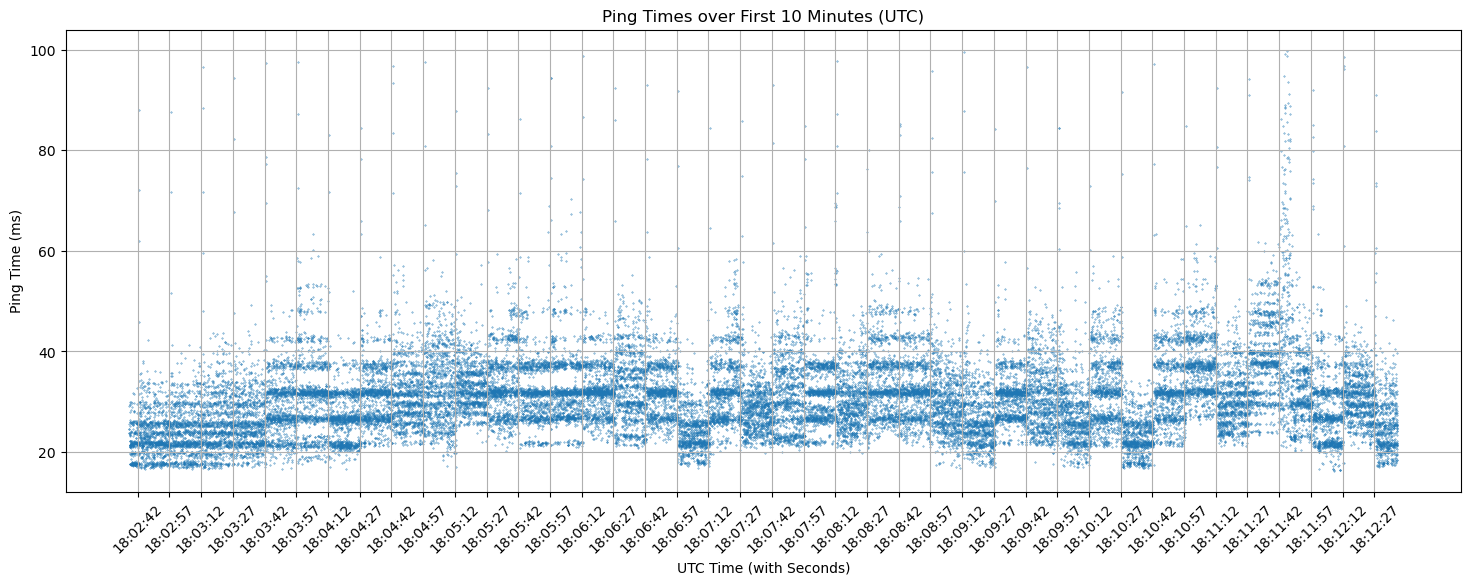

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Loading the file content
file_path = 'outping.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Filter the DataFrame to include only the first 10 minutes
start_time = df['UTC Time'].min()
end_time = start_time + pd.Timedelta(minutes=10)
filtered_df = df[(df['UTC Time'] >= start_time) & (df['UTC Time'] <= end_time)]

# Generating x-ticks at specific seconds of each minute
xticks = pd.date_range(start=start_time, end=end_time, freq='S')
xticks = xticks[xticks.second.isin([12, 27, 42, 57])]

# Plotting the data as a scatter plot with smaller markers
plt.figure(figsize=(18, 6))
plt.scatter(filtered_df['UTC Time'], filtered_df['Ping Time'], marker='o', s=0.1)  # s controls the size of the markers
plt.xlabel('UTC Time (with Seconds)')
plt.ylabel('Ping Time (ms)')
plt.title('Ping Times over First 10 Minutes (UTC)')
plt.xticks(xticks, xticks.strftime('%H:%M:%S'), rotation=45)
plt.grid(True)
plt.show()


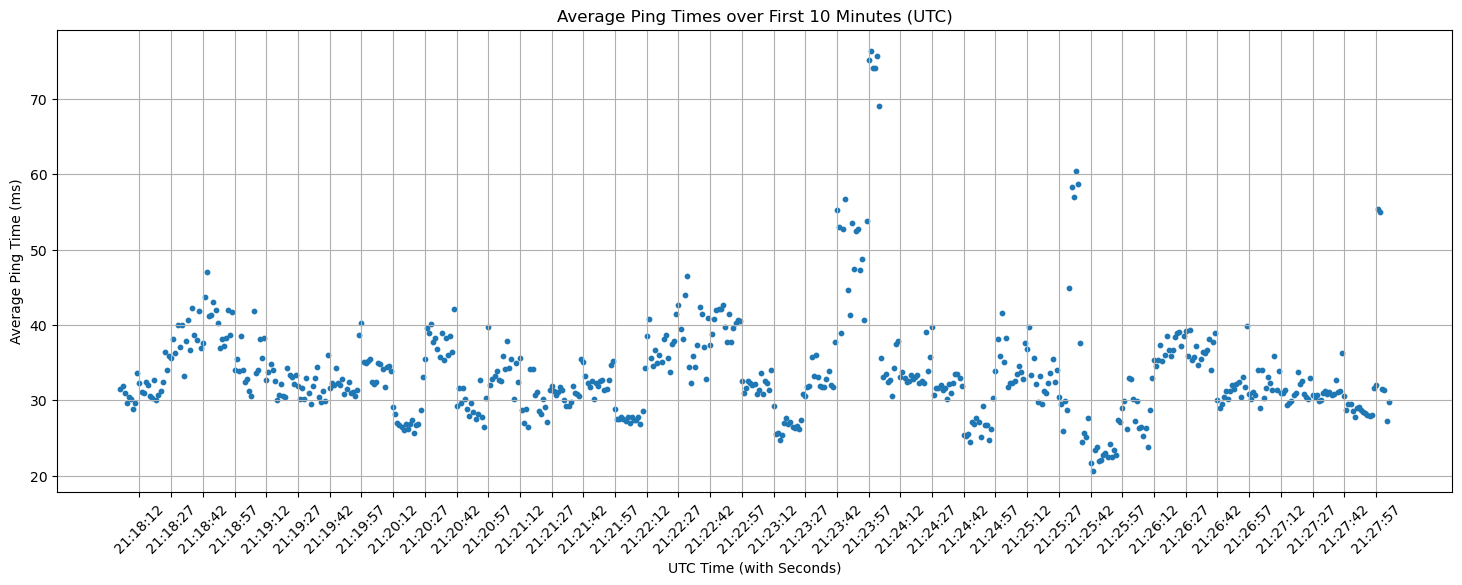

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Loading the file content
file_path = 'o.txt'  # Update this path to the actual file location
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extracting the timestamp and the ping time with more robust parsing
data = []
for line in lines:
    match = re.search(r'\[(\d+\.\d+)\] 64 bytes from .+ time=(\d+\.\d+)', line)
    if match:
        timestamp = float(match.group(1))
        ping_time = float(match.group(2))
        data.append([timestamp, ping_time])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Ping Time'])

# Converting the timestamps to UTC
df['UTC Time'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Rounding the time to the nearest second for aggregation
df['Rounded Time'] = df['UTC Time'].dt.round('S')

# Calculating the average ping time for each second
average_ping_per_second = df.groupby('Rounded Time')['Ping Time'].mean().reset_index()

# Filter the DataFrame to include only the first 10 minutes
start_time = average_ping_per_second['Rounded Time'].min()
end_time = start_time + pd.Timedelta(minutes=10)
filtered_df = average_ping_per_second[(average_ping_per_second['Rounded Time'] >= start_time) & (average_ping_per_second['Rounded Time'] <= end_time)]

# Generating x-ticks at specific seconds of each minute
xticks = pd.date_range(start=start_time, end=end_time, freq='S')
xticks = xticks[xticks.second.isin([12, 27, 42, 57])]

# Plotting the data as a scatter plot with smaller markers
plt.figure(figsize=(18, 6))
plt.scatter(filtered_df['Rounded Time'], filtered_df['Ping Time'], marker='o', s=10)  # s controls the size of the markers
plt.xlabel('UTC Time (with Seconds)')
plt.ylabel('Average Ping Time (ms)')
plt.title('Average Ping Times over First 10 Minutes (UTC)')
plt.xticks(xticks, xticks.strftime('%H:%M:%S'), rotation=45)
plt.grid(True)
plt.show()
